<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/ReconocimientoPatrones/blob/master/PR_L06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento de Patrones
##Dr. Carlos Villaseñor
##Lección 6 - Reducción de la dimensionalidad

## Reducción de la dimensionalidad con t-SNE

Primeramente importaremos unos paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from google.colab import files

Leemos los datos


In [2]:
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [7]:
n_samples = 5000
x=x[:n_samples,:]
y=np.array(y[:n_samples].ravel(),dtype=np.int)
print(x.shape, y.shape)

(5000, 784) (5000,)


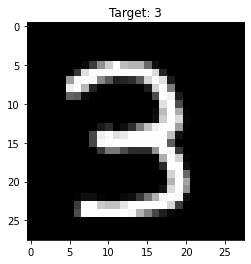

In [33]:
# Dibujar un ejemplo de manera aleatoria
sample = np.random.randint(n_samples)
plt.imshow(x[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Target: %i'%y[sample])
plt.show()

In [10]:
 model = TSNE(n_components=2, n_iter=2000, n_jobs=-1)

In [11]:
x_2d = model.fit_transform(x)
x_2d.shape

(5000, 2)

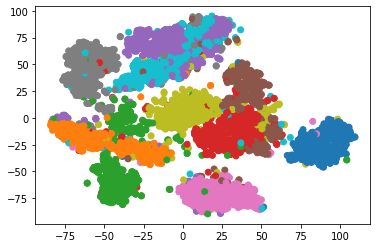

In [12]:
plt.scatter(x_2d[:,0],x_2d[:,1], c=y, cmap=plt.cm.tab10)

## Clasificación de digitos con PCA y SVM

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm, metrics

In [14]:
# Separar conjuntos de entrenamiento y prueba
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

In [15]:
 # Instanciar modelo
model = Pipeline([('scaler', StandardScaler()),
                  ('PCA', PCA(n_components=50)),
                  ('SVM', svm.SVC(gamma=0.0001))])

In [16]:
 # Entrenar modelo
model.fit(xtrain, ytrain)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('SVM',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.0001, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [17]:
# Aplicar metrica al modelo
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

Train:  0.8955555555555555
Test:  0.878


In [18]:
# Hacer predicciones del test
ypred = model.predict(xtest)

In [19]:
print('Classification report: \n', metrics.classification_report(ytest, ypred))

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.81      0.98      0.89        60
           2       0.85      0.70      0.77        40
           3       0.89      0.93      0.91        45
           4       0.87      0.90      0.89        52
           5       0.90      0.82      0.86        44
           6       0.93      0.88      0.90        64
           7       0.97      0.92      0.95        66
           8       0.84      0.80      0.82        46
           9       0.77      0.83      0.80        36

    accuracy                           0.88       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.88      0.88      0.88       500



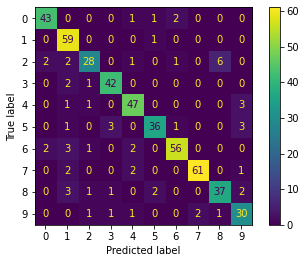

In [20]:
metrics.plot_confusion_matrix(model, xtest, ytest)

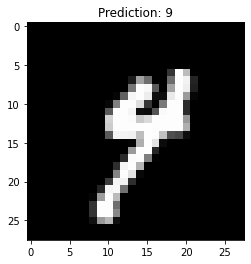

In [38]:
# Dibujar una predicción aleatoria
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Prediction: %i' % ypred[sample])
plt.show()

## Guardar Modelo

In [41]:
# Guardar modelo
from joblib import dump
dump(model, 'mnist_classifier.joblib')

['mnist_classifier.joblib']

In [42]:
from joblib import load
model2 = load('mnist_classifier.joblib')

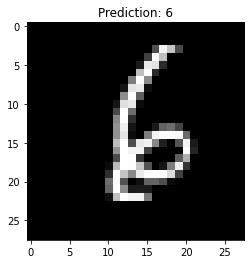

In [51]:
# Dibujar una predicción aleatoria
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap=plt.cm.gray)
ypred = model2.predict(xtest[sample].reshape(1,-1))
plt.title('Prediction: %i' % ypred)
plt.show()